In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [102]:
df = pd.read_csv("Sub-Categorized-Dataset.csv")

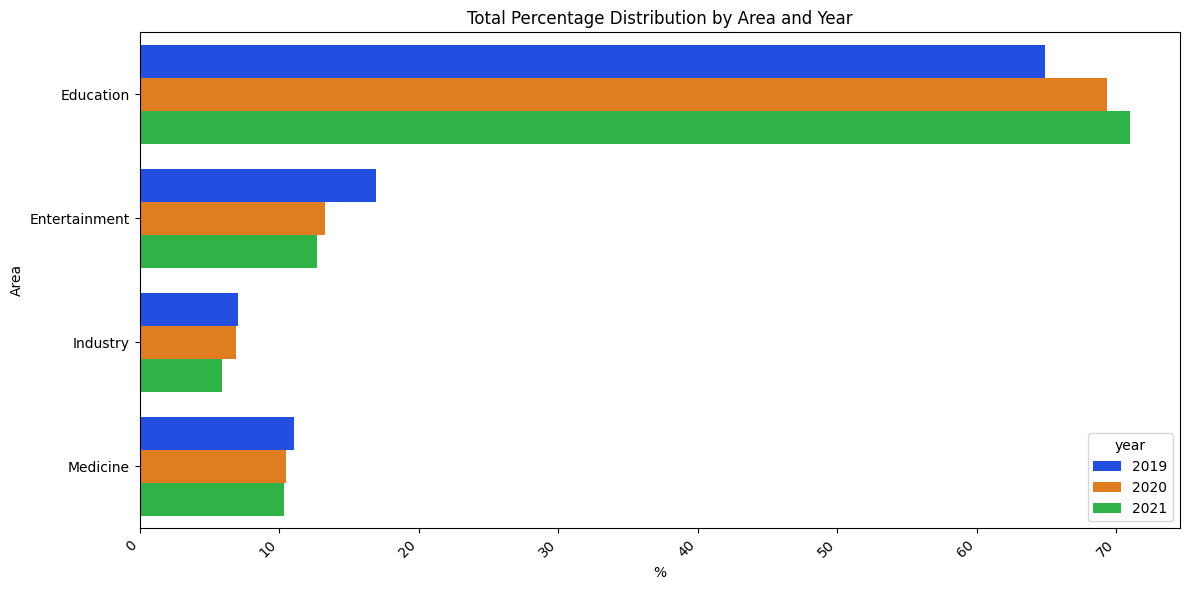

In [135]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='%', y='Area', hue='year', palette='bright')
plt.xlabel('%')
plt.ylabel('Area')
plt.title('Total Percentage Distribution by Area and Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='year')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

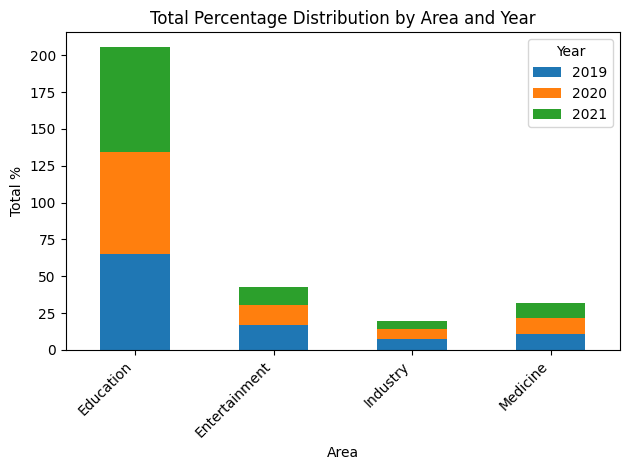

In [105]:
# Create a stacked bar plot
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Area')
plt.ylabel('Total %')
plt.title('Total Percentage Distribution by Area and Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [59]:
# Encode the 'Area' column
label_encoder = LabelEncoder()
df['Area_encoded'] = label_encoder.fit_transform(df['Area'])

In [60]:
# Separate the features and target variables
X = df[['Area_encoded', 'year']].values
y_N = df['N'].values
y_percent = df['%'].values

In [61]:
# Split the data into train and test sets
X_train, X_test, y_N_train, y_N_test, y_percent_train, y_percent_test = train_test_split(
    X, y_N, y_percent, test_size=0.2, random_state=42)

In [62]:
# Data augmentation using noise addition
augmented_X_train = []
augmented_y_N_train = []
augmented_y_percent_train = []

for i in range(10):  # Generate 10 synthetic samples for each original sample
    for X_sample, y_N_sample, y_percent_sample in zip(X_train, y_N_train, y_percent_train):
        noise_X = np.random.normal(0, 0.1, size=X_sample.shape)  # Add random noise to features
        noise_y_N = np.random.normal(0, 0.1)  # Add random noise to target variable 'N'
        noise_y_percent = np.random.normal(0, 0.1)  # Add random noise to target variable '%'

        augmented_X_train.append(X_sample + noise_X)
        augmented_y_N_train.append(y_N_sample + noise_y_N)
        augmented_y_percent_train.append(y_percent_sample + noise_y_percent)

augmented_X_train = np.array(augmented_X_train)
augmented_y_N_train = np.array(augmented_y_N_train)
augmented_y_percent_train = np.array(augmented_y_percent_train)

In [63]:
# Concatenate augmented and original data
X_train_augmented = np.concatenate([X_train, augmented_X_train], axis=0)
y_N_train_augmented = np.concatenate([y_N_train, augmented_y_N_train], axis=0)
y_percent_train_augmented = np.concatenate([y_percent_train, augmented_y_percent_train], axis=0)

In [64]:
# Train the Random Forest models on augmented data
rf_model_N = RandomForestRegressor()
rf_model_N.fit(X_train_augmented, y_N_train_augmented)

rf_model_percent = RandomForestRegressor()
rf_model_percent.fit(X_train_augmented, y_percent_train_augmented)

RandomForestRegressor()

In [65]:
# Predict on the train set
y_N_train_pred = rf_model_N.predict(X_train)
y_percent_train_pred = rf_model_percent.predict(X_train)

In [66]:
# Predict on the test set
y_N_test_pred = rf_model_N.predict(X_test)
y_percent_test_pred = rf_model_percent.predict(X_test)

In [67]:
# Calculate R-squared scores for train and test data
r2_train_N = r2_score(y_N_train, y_N_train_pred)
r2_test_N = r2_score(y_N_test, y_N_test_pred)

r2_train_percent = r2_score(y_percent_train, y_percent_train_pred)
r2_test_percent = r2_score(y_percent_test, y_percent_test_pred)

print("R-squared scores for 'N':")
print(f"Train: {r2_train_N:.4f}")
print(f"Test: {r2_test_N:.4f}")

print("\nR-squared scores for '%':")
print(f"Train: {r2_train_percent:.4f}")
print(f"Test: {r2_test_percent:.4f}")

R-squared scores for 'N':
Train: 1.0000
Test: 0.7530

R-squared scores for '%':
Train: 1.0000
Test: 0.9889


In [68]:
# Create a new dataset for the year 2023
unique_areas = df['Area_encoded'].unique()
X_new = [[area, 2023] for area in unique_areas]

In [69]:
# Predict the values of 'N' and '%' for the year 2023 using the trained models
y_N_pred = rf_model_N.predict(X_new).round().astype(int)
y_percent_pred = rf_model_percent.predict(X_new)

In [70]:
# Decode the encoded 'Area' values
decoded_areas = label_encoder.inverse_transform(unique_areas)

In [71]:
# Create a new DataFrame with the predicted values
predicted_df = pd.DataFrame({'Area': decoded_areas, 'year': 2023, 'N': y_N_pred, '%': y_percent_pred})

In [72]:
# Save the new dataset as a CSV file
predicted_df.to_csv("predicted_data2023.csv", index=False)

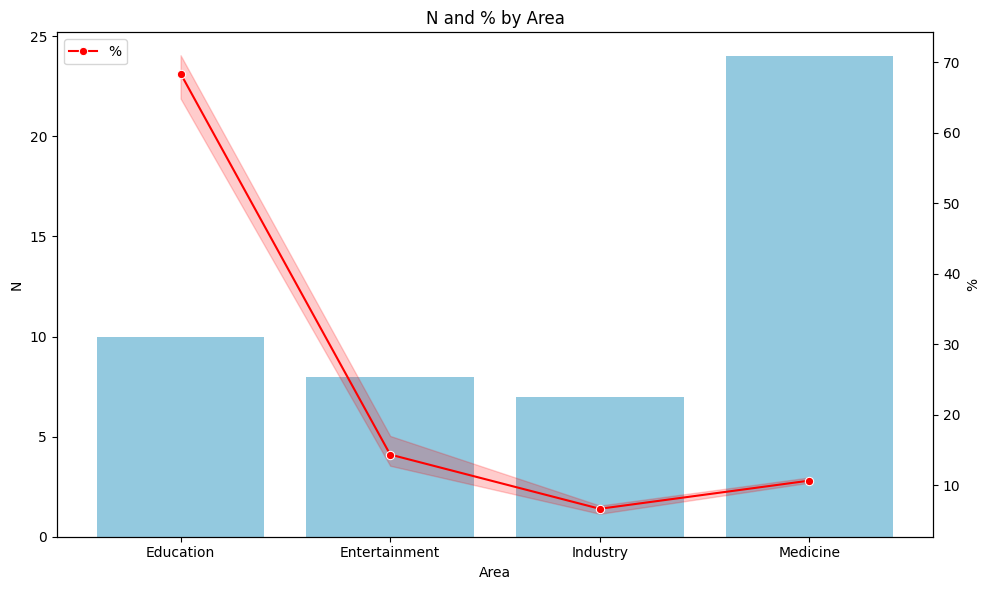

In [134]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the 'N' values as a bar plot
sns.barplot(data=predicted_df, x='Area', y='N', color='skyblue', label='N')

# Plot the '%' values as a line plot on a secondary y-axis
ax = plt.twinx()
sns.lineplot(data=df, x='Area', y='%', color='red', marker='o', label='%')

# Set the labels and title
plt.xlabel('Area')
plt.ylabel('N')
ax.set_ylabel('%')
plt.title('N and % by Area')

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper left')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()